In [1]:
import pandas as pd
import glob as gb
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS, CountVectorizer, TfidfTransformer
from sklearn.preprocessing import LabelEncoder
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.pipeline import Pipeline

In [2]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score
from sklearn.model_selection import  RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [3]:
TrnFlsPth=gb.glob("DTrain/*/*")
TstFlsPth=gb.glob("DTest/*/*")

In [4]:
Tr_lbl=[e.strip().split('\\')[1] for e in TrnFlsPth]
Ts_lbl=[e.strip().split('\\')[1] for e in TstFlsPth]
trl=[]
a={trl.append(e) for e in Tr_lbl if(e not in trl)}
tsl=[]
a={tsl.append(e) for e in Ts_lbl if(e not in tsl)}
a=None
print(trl, '\n', tsl)

['alum', 'barley', 'coffee', 'dmk', 'fuel', 'livestock', 'palm-oil', 'retail', 'soybean', 'veg-oil'] 
 ['alum', 'barley', 'coffee', 'dmk', 'fuel', 'livestock', 'palm-oil', 'retail', 'soybean', 'veg-oil']


In [5]:
le =LabelEncoder()
Y_Tr=le.fit_transform(Tr_lbl)
Y_Ts=le.fit_transform(Ts_lbl)

In [6]:
fpt=[open(f) for f in TrnFlsPth]
Trfob=[f.read().replace("\\",'').replace('//',' ').replace('/',' ') for f in fpt]
all(f.close() for f in fpt)

False

In [7]:
fpt=[open(f) for f in TstFlsPth]
Tsfob=[f.read().replace("\\",'').replace('//',' ').replace('/',' ') for f in fpt]
all(f.close() for f in fpt)
fpt=None

In [8]:
rd={'\n':' ','<':' ','>':' ','(':' ',')':' ','[':' ',']':' ','{':' ','}':' ','?':' ',  
    ':':' ', ",":'','.':' ', '|':' ', '_':' ', '||':' '}
#\

In [9]:
Trfob=[''.join([rd.get(c,c) for c in flob]) for flob in Trfob]
Tsfob=[''.join([rd.get(c,c) for c in flob]) for flob in Tsfob]

In [10]:
Trfob=[' '.join(flob.split()) for flob in Trfob]
Tsfob=[' '.join(flob.split()) for flob in Tsfob]

In [11]:
lm=WordNetLemmatizer()
ps=PorterStemmer()
Trfob=[' '.join([lm.lemmatize(word) for word in text.split(' ')]) for text in Trfob]
Tsfob=[' '.join([lm.lemmatize(word) for word in text.split(' ')]) for text in Tsfob]
Trfob=[' '.join([ps.stem(word) for word in text.split(' ')]) for text in Trfob]
Tsfob=[' '.join([ps.stem(word) for word in text.split(' ')]) for text in Tsfob]

In [12]:
Trfob[0]

"nippon light metal continu aluminium output cut tokyo march 2 - nippon light metal Co ltd nlgt T which ha annual capac of 63000 tonn will continu primari aluminium product at a rate of 35000 tonn owe to low domest and world price and low water suppli at it hydroelectr power plant a compani offici said nippon which ha no plan to restor output to the 48000 tonn a year at which it wa work until late 1986 will becom japan' onli smelter ryoka light metal industri ltd will stop smelt in april owe to high power cost and low price and mitsui aluminium Co ltd ha said it stop smelt in februari"

In [13]:
vc=CountVectorizer(analyzer='word', binary=False, lowercase=True, max_df=0.3, min_df=1,
                   ngram_range=(1, 1), stop_words='english')
idft=TfidfTransformer()

In [14]:
TrDvcX=vc.fit_transform(Trfob)
TrDtvcX=idft.fit_transform(TrDvcX.toarray())
###############
TsDvcX=vc.transform(Tsfob)
TsDtvcX=idft.transform(TsDvcX.toarray())

In [15]:
TrDvc=pd.DataFrame(TrDvcX.toarray(), columns=vc.get_feature_names())
TrDtvc=pd.DataFrame(TrDtvcX.toarray(), columns=vc.get_feature_names())
###############
TsDvc=pd.DataFrame(TsDvcX.toarray(), columns=vc.get_feature_names())
TsDtvc=pd.DataFrame(TsDtvcX.toarray(), columns=vc.get_feature_names())

In [16]:
print(TrDvc.shape, TrDtvc.shape, TsDvc.shape, TsDtvc.shape)

(499, 5694) (499, 5694) (185, 5694) (185, 5694)


In [17]:
lex=['0','00','000','0000']
exstp=[fv for fv in TrDtvc if(len(fv)<3)]
stpwd=ENGLISH_STOP_WORDS.union(exstp,lex)
len(stpwd)

488

In [18]:
#########

In [19]:
evlp=['Precision_micro','Recall_micro','Precision_macro','Recall_macro','f1_micro',
     'f1_macro','Accuracy']
confp=['max df','min df','ngram','idf','no. token','algorithm','leafsize',
       'metric','K','p']
confg=[]
prf=[]
clfk=KNeighborsClassifier()

In [20]:
clfk.fit(TrDvc, Tr_lbl)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [21]:
y_pred=clfk.predict(TsDvc)
a1=precision_score(Ts_lbl, y_pred, average='micro')
a2=recall_score(Ts_lbl, y_pred, average='micro')
a3=precision_score(Ts_lbl, y_pred, average='macro')
a4=recall_score(Ts_lbl, y_pred, average='macro') 
print(a1,'\n',a2,'\n',a3,'\n',a4)

0.5783783783783784 
 0.5783783783783784 
 0.6407062111330404 
 0.6006629455542499


In [22]:
a5=f1_score(Ts_lbl, y_pred, average='micro')
a6=f1_score(Ts_lbl, y_pred, average='macro')
a7=accuracy_score(Ts_lbl, y_pred)
print(a5,'\n',a6,'\n',a7)
prf.append((round(a1,4),round(a2,4),round(a3,4),round(a4,4),round(a5,4),round(a6,4),
              round(a7,4)))
confg.append(('0.3','1',"1 - 1",'No','5694','auto','30','minkowski','5','2'))

0.5783783783783784 
 0.5417071431483197 
 0.5783783783783784


In [23]:
cm=confusion_matrix(Ts_lbl, y_pred)
m=pd.DataFrame(cm, columns=tsl, index=tsl)

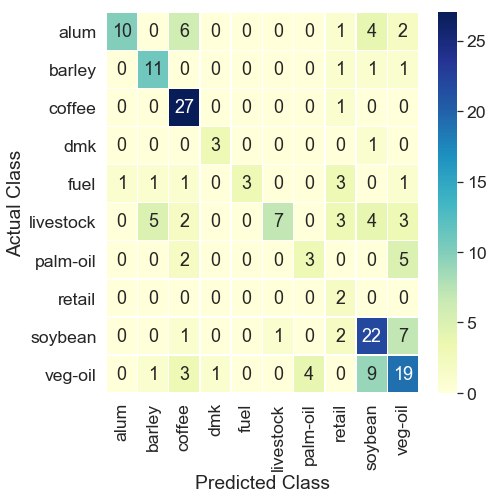

In [24]:
plt.figure(figsize=(7,7))
sb.set(font_scale=1.6)
sb.heatmap(m, annot=True, cmap="YlGnBu", linewidths=.5, annot_kws={"size": 18})
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
#plt.title('Confusion Matrix KNN_fig1')
plt.savefig('Fig/KNNcm1.png', dpi=300, bbox_inches='tight', pad_inches=0.2)

In [25]:
################t

In [26]:
clfk.fit(TrDtvc, Tr_lbl) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [27]:
y_pred=clfk.predict(TsDtvc)
a1=precision_score(Ts_lbl, y_pred, average='micro')
a2=recall_score(Ts_lbl, y_pred, average='micro')
a3=precision_score(Ts_lbl, y_pred, average='macro')
a4=recall_score(Ts_lbl, y_pred, average='macro') 
print(a1,'\n',a2,'\n',a3,'\n',a4)

0.6918918918918919 
 0.6918918918918919 
 0.7297990966721617 
 0.6970608298869169


In [28]:
a5=f1_score(Ts_lbl, y_pred, average='micro')
a6=f1_score(Ts_lbl, y_pred, average='macro')
a7=accuracy_score(Ts_lbl, y_pred)
print(a5,'\n',a6,'\n',a7)
prf.append((round(a1,4),round(a2,4),round(a3,4),round(a4,4),round(a5,4),round(a6,4),
              round(a7,4)))
confg.append(('0.3','1',"1 - 1",'Yes','5694','auto','30','minkowski','5','2'))

0.6918918918918919 
 0.6811779324718897 
 0.6918918918918919


In [29]:
cm=confusion_matrix(Ts_lbl, y_pred)
m=pd.DataFrame(cm, columns=tsl, index=tsl)

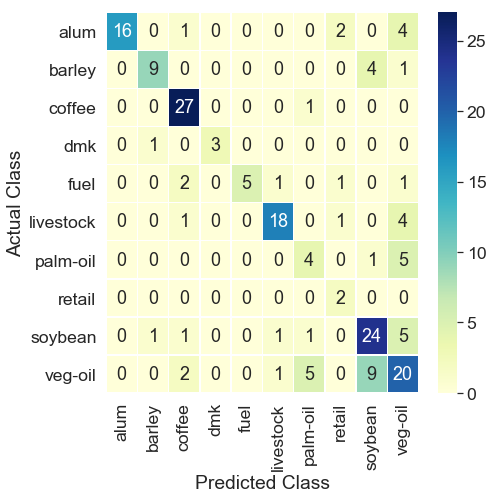

In [30]:
plt.figure(figsize=(7,7))
sb.set(font_scale=1.6)
sb.heatmap(m, annot=True, cmap="YlGnBu", linewidths=.5, fmt="d", annot_kws={"size": 18})
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.savefig('Fig/KNNcm2.png', dpi=300, bbox_inches='tight', pad_inches=0.2)

In [31]:
stp=pd.DataFrame(confg, columns=confp)
stp.to_csv('CSVOUT/KNNconf1.csv')
stp

,max df,min df,ngram,idf,no. token,algorithm,leafsize,metric,K,p
0,0.3,1,1 - 1,No,5694,auto,30,minkowski,5,2
1,0.3,1,1 - 1,Yes,5694,auto,30,minkowski,5,2


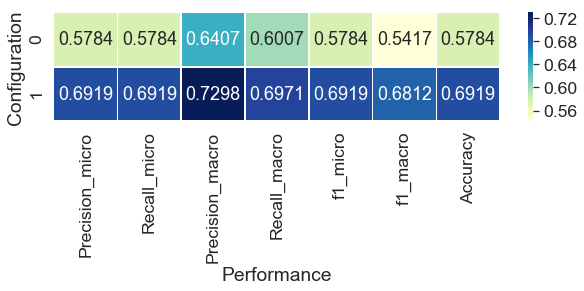

In [32]:
rsl=pd.DataFrame(prf, columns=evlp)
rsl.to_csv('CSVOUT/KNNprf1.csv')
plt.figure(figsize=(10,2))
sb.set(font_scale=1.6)
sb.heatmap(rsl, annot=True, cmap="YlGnBu", linewidths=.5, fmt="g", annot_kws={"size": 18})
plt.xlabel('Performance')
plt.ylabel('Configuration')
#plt.title('Confusion Matrix KNN_fig2')
plt.savefig('Fig/KNNprf1.png', dpi=300, bbox_inches='tight', pad_inches=0.2)

In [33]:
ruk ruk################

In [34]:
prf=[]
clsfv=KNeighborsClassifier()
clsfv

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [35]:
pipclf = Pipeline([('vct', vc), ('clf',clsfv)])#('idf', idft),

In [36]:
mxd=[ 0.3, 0.35, 0.4]
mid=[0.005,0.01, 0.05, 0.1,1]
ngm=[(1,2),(1,3),(2,5),(1,7),(1,9),(1,12)]

In [37]:
K=[7,10,12,15,18]
lfsz=[30,40,60,75,100]

In [38]:
#mtr=['cosine'] ##'minkowski', not supported for sparse matrix
#alg=['kd_tree', 'brute']#ball_tree
#pp=[1,2,3,4]
pramg={"vct__max_df":mxd, "vct__min_df":mid, "vct__ngram_range":ngm,
       "vct__stop_words":['english', stpwd],
       "clf__algorithm":["brute"], "clf__leaf_size":lfsz, "clf__n_neighbors":K,
       "clf__metric":['cosine'],
       }#"clf__metric":mtr,

In [39]:
rCV=RandomizedSearchCV(pipclf, pramg, n_jobs=7, cv=10, scoring='f1_micro',
                        return_train_score=True) 
##f1_score(average='macro')
rCV.fit(Trfob, Tr_lbl)
clfrb=rCV.best_estimator_

c:\python\python37\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [40]:
clfrb.named_steps

{'vct': CountVectorizer(analyzer='word', binary=False, decode_error='strict',
         dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
         lowercase=True, max_df=0.35, max_features=None, min_df=0.005,
         ngram_range=(1, 9), preprocessor=None,
         stop_words=frozenset({'el', 'several', 'be', 'then', 'they', '60', 'al', '90', 'vt', 'both', '06', '22', '31', 'last', 'now', 'whom', '51', 'about', 'dn', 'name', '61', 'co', '85', 'everything', 'being', 'beside', 'hi', 'in', 'sometime', '11', 'moreover', 'do', 'down', 'seeming', 'something', '72', ... '37', 'onto', '56', 'whereupon', '86', 'through', 'st', 're', 'via', 'further', 'very', 'amongst'}),
         strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
         tokenizer=None, vocabulary=None),
 'clf': KNeighborsClassifier(algorithm='brute', leaf_size=75, metric='cosine',
            metric_params=None, n_jobs=None, n_neighbors=7, p=2,
            weights='uniform')}

In [41]:
clfrb.fit(Trfob, Tr_lbl)
y_pred=clfrb.predict(Tsfob) 
a1=precision_score(Ts_lbl, y_pred, average='micro')
a2=recall_score(Ts_lbl, y_pred, average='micro')
a3=precision_score(Ts_lbl, y_pred, average='macro')
a4=recall_score(Ts_lbl, y_pred, average='macro') 
a5=f1_score(Ts_lbl, y_pred, average='micro')
a6=f1_score(Ts_lbl, y_pred, average='macro')
a7=accuracy_score(Ts_lbl, y_pred)
print(a1,'\n',a2,'\n',a3,'\n',a4,'\n',a5,'\n',a6,'\n',a7)
prf.append((round(a1,4),round(a2,4),round(a3,4),round(a4,4),round(a5,4),round(a6,4),
              round(a7,4)))

0.654054054054054 
 0.654054054054054 
 0.6828121732069101 
 0.6305569714265367 
 0.654054054054054 
 0.6037045536773322 
 0.654054054054054


In [42]:
#############

In [43]:
rCV=RandomizedSearchCV(pipclf, pramg, n_jobs=7, cv=10, scoring='f1_micro',
                        return_train_score=True) 
##f1_score(average='macro')
rCV.fit(Trfob, Tr_lbl)
clfrb=rCV.best_estimator_

c:\python\python37\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [44]:
clfrb.named_steps

{'vct': CountVectorizer(analyzer='word', binary=False, decode_error='strict',
         dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
         lowercase=True, max_df=0.35, max_features=None, min_df=0.05,
         ngram_range=(1, 7), preprocessor=None,
         stop_words=frozenset({'el', 'several', 'be', 'then', 'they', '60', 'al', '90', 'vt', 'both', '06', '22', '31', 'last', 'now', 'whom', '51', 'about', 'dn', 'name', '61', 'co', '85', 'everything', 'being', 'beside', 'hi', 'in', 'sometime', '11', 'moreover', 'do', 'down', 'seeming', 'something', '72', ... '37', 'onto', '56', 'whereupon', '86', 'through', 'st', 're', 'via', 'further', 'very', 'amongst'}),
         strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
         tokenizer=None, vocabulary=None),
 'clf': KNeighborsClassifier(algorithm='brute', leaf_size=75, metric='cosine',
            metric_params=None, n_jobs=None, n_neighbors=12, p=2,
            weights='uniform')}

In [45]:
clfrb.fit(Trfob, Tr_lbl)
y_pred=clfrb.predict(Tsfob) 
a1=precision_score(Ts_lbl, y_pred, average='micro')
a2=recall_score(Ts_lbl, y_pred, average='micro')
a3=precision_score(Ts_lbl, y_pred, average='macro')
a4=recall_score(Ts_lbl, y_pred, average='macro') 
a5=f1_score(Ts_lbl, y_pred, average='micro')
a6=f1_score(Ts_lbl, y_pred, average='macro')
a7=accuracy_score(Ts_lbl, y_pred)
print(a1,'\n',a2,'\n',a3,'\n',a4,'\n',a5,'\n',a6,'\n',a7)
prf.append((round(a1,4),round(a2,4),round(a3,4),round(a4,4),round(a5,4),round(a6,4),
              round(a7,4)))

0.6270270270270271 
 0.6270270270270271 
 0.6454334454071295 
 0.6276051474964518 
 0.6270270270270271 
 0.5955976941816113 
 0.6270270270270271


In [46]:
##############ruk ruk

In [47]:
#mtr=['cosine'] #'minkowski', not supported for sparse matrix
alg=['ball_tree','kd_tree']#ball_tree
pp=[2,3,4]
pramg={"vct__max_df":mxd, "vct__min_df":mid, "vct__ngram_range":ngm,
       "vct__stop_words":['english', stpwd],
       "clf__algorithm":alg, "clf__leaf_size":lfsz, "clf__n_neighbors":K,
       "clf__metric":['euclidean'], "clf__p":pp
       }#"clf__metric":mtr,"clf__metric":['chebyshev'],

In [48]:
rCV=RandomizedSearchCV(pipclf, pramg, n_jobs=7, cv=10, scoring='f1_micro',
                        return_train_score=True) 
##f1_score(average='macro')
rCV.fit(Trfob, Tr_lbl)
clfrb=rCV.best_estimator_

c:\python\python37\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
c:\python\python37\lib\site-packages\sklearn\neighbors\base.py:217: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "


In [49]:
clfrb.named_steps

{'vct': CountVectorizer(analyzer='word', binary=False, decode_error='strict',
         dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
         lowercase=True, max_df=0.4, max_features=None, min_df=0.1,
         ngram_range=(1, 3), preprocessor=None, stop_words='english',
         strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
         tokenizer=None, vocabulary=None),
 'clf': KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='euclidean',
            metric_params=None, n_jobs=None, n_neighbors=12, p=3,
            weights='uniform')}

In [50]:
clfrb.fit(Trfob, Tr_lbl)
y_pred=clfrb.predict(Tsfob) 
a1=precision_score(Ts_lbl, y_pred, average='micro')
a2=recall_score(Ts_lbl, y_pred, average='micro')
a3=precision_score(Ts_lbl, y_pred, average='macro')
a4=recall_score(Ts_lbl, y_pred, average='macro') 
a5=f1_score(Ts_lbl, y_pred, average='micro')
a6=f1_score(Ts_lbl, y_pred, average='macro')
a7=accuracy_score(Ts_lbl, y_pred)
print(a1,'\n',a2,'\n',a3,'\n',a4,'\n',a5,'\n',a6,'\n',a7)
prf.append((round(a1,4),round(a2,4),round(a3,4),round(a4,4),round(a5,4),round(a6,4),
              round(a7,4)))

0.4918918918918919 
 0.4918918918918919 
 0.5689591445480419 
 0.48796938666503886 
 0.4918918918918919 
 0.44706617888653233 
 0.4918918918918919


c:\python\python37\lib\site-packages\sklearn\neighbors\base.py:217: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "


In [51]:
rCV=RandomizedSearchCV(pipclf, pramg, n_jobs=7, cv=10, scoring='f1_micro',
                        return_train_score=True) 
##f1_score(average='macro')
rCV.fit(Trfob, Tr_lbl)
clfrb=rCV.best_estimator_

c:\python\python37\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
c:\python\python37\lib\site-packages\sklearn\neighbors\base.py:217: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "


In [52]:
clfrb.named_steps

{'vct': CountVectorizer(analyzer='word', binary=False, decode_error='strict',
         dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
         lowercase=True, max_df=0.35, max_features=None, min_df=0.01,
         ngram_range=(1, 2), preprocessor=None,
         stop_words=frozenset({'el', 'several', 'be', 'then', 'they', '60', 'al', '90', 'vt', 'both', '06', '22', '31', 'last', 'now', 'whom', '51', 'about', 'dn', 'name', '61', 'co', '85', 'everything', 'being', 'beside', 'hi', 'in', 'sometime', '11', 'moreover', 'do', 'down', 'seeming', 'something', '72', ... '37', 'onto', '56', 'whereupon', '86', 'through', 'st', 're', 'via', 'further', 'very', 'amongst'}),
         strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
         tokenizer=None, vocabulary=None),
 'clf': KNeighborsClassifier(algorithm='kd_tree', leaf_size=75, metric='euclidean',
            metric_params=None, n_jobs=None, n_neighbors=10, p=2,
            weights='uniform')}

In [53]:
clfrb.fit(Trfob, Tr_lbl)
y_pred=clfrb.predict(Tsfob) 
a1=precision_score(Ts_lbl, y_pred, average='micro')
a2=recall_score(Ts_lbl, y_pred, average='micro')
a3=precision_score(Ts_lbl, y_pred, average='macro')
a4=recall_score(Ts_lbl, y_pred, average='macro') 
a5=f1_score(Ts_lbl, y_pred, average='micro')
a6=f1_score(Ts_lbl, y_pred, average='macro')
a7=accuracy_score(Ts_lbl, y_pred)
print(a1,'\n',a2,'\n',a3,'\n',a4,'\n',a5,'\n',a6,'\n',a7)
prf.append((round(a1,4),round(a2,4),round(a3,4),round(a4,4),round(a5,4),round(a6,4),
              round(a7,4)))

0.5513513513513514 
 0.5513513513513514 
 0.6506010656010656 
 0.5792617674139413 
 0.5513513513513514 
 0.5556326282127356 
 0.5513513513513514


c:\python\python37\lib\site-packages\sklearn\neighbors\base.py:217: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "


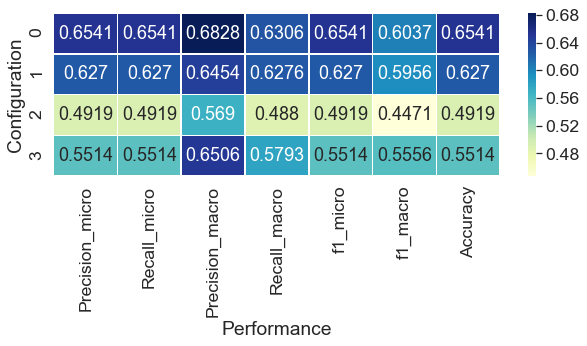

In [54]:
rsl=pd.DataFrame(prf, columns=evlp)
rsl.to_csv('CSVOUT/KNNprf2.csv')
plt.figure(figsize=(10,3))
sb.set(font_scale=1.6)
sb.heatmap(rsl, annot=True, cmap="YlGnBu", linewidths=.5, fmt="g", annot_kws={"size": 18})
plt.xlabel('Performance')
plt.ylabel('Configuration')
#plt.title('Confusion Matrix KNN_fig2')
plt.savefig('Fig/KNNprf2.png', dpi=300, bbox_inches='tight', pad_inches=0.2)

In [55]:
#ruk ruk ################ ruk ruk##########################################

In [56]:
prf=[]
pipclf = Pipeline([('vct', vc), ('idf', idft), ('clf',clsfv)])#

In [57]:
#mtr=['cosine'] ##'minkowski', not supported for sparse matrix
#alg=['kd_tree', 'brute']#ball_tree
#pp=[1,2,3,4]
pramg={"vct__max_df":mxd, "vct__min_df":mid, "vct__ngram_range":ngm,
       "vct__stop_words":['english', stpwd],
       "clf__algorithm":["brute"], "clf__leaf_size":lfsz, "clf__n_neighbors":K,
       "clf__metric":['cosine'],
       }#"clf__metric":mtr,

In [58]:
########ruk ruk

In [59]:
rCV=RandomizedSearchCV(pipclf, pramg, n_jobs=7, cv=10, scoring='f1_micro',
                        return_train_score=True) 
##f1_score(average='macro')
rCV.fit(Trfob, Tr_lbl)
clfrb=rCV.best_estimator_

c:\python\python37\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [60]:
clfrb.named_steps

{'vct': CountVectorizer(analyzer='word', binary=False, decode_error='strict',
         dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
         lowercase=True, max_df=0.35, max_features=None, min_df=0.01,
         ngram_range=(1, 2), preprocessor=None, stop_words='english',
         strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
         tokenizer=None, vocabulary=None),
 'idf': TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True),
 'clf': KNeighborsClassifier(algorithm='brute', leaf_size=40, metric='cosine',
            metric_params=None, n_jobs=None, n_neighbors=18, p=2,
            weights='uniform')}

In [61]:
clfrb.fit(Trfob, Tr_lbl)
y_pred=clfrb.predict(Tsfob) 
a1=precision_score(Ts_lbl, y_pred, average='micro')
a2=recall_score(Ts_lbl, y_pred, average='micro')
a3=precision_score(Ts_lbl, y_pred, average='macro')
a4=recall_score(Ts_lbl, y_pred, average='macro') 
a5=f1_score(Ts_lbl, y_pred, average='micro')
a6=f1_score(Ts_lbl, y_pred, average='macro')
a7=accuracy_score(Ts_lbl, y_pred)
print(a1,'\n',a2,'\n',a3,'\n',a4,'\n',a5,'\n',a6,'\n',a7)
prf.append((round(a1,4),round(a2,4),round(a3,4),round(a4,4),round(a5,4),round(a6,4),
              round(a7,4)))

0.6648648648648648 
 0.6648648648648648 
 0.6900673912376041 
 0.6424767525854482 
 0.6648648648648648 
 0.6263755980861244 
 0.6648648648648648


In [62]:
##############

In [63]:
rCV=RandomizedSearchCV(pipclf, pramg, n_jobs=7, cv=10, scoring='f1_micro',
                        return_train_score=True) 
##f1_score(average='macro')
rCV.fit(Trfob, Tr_lbl)
clfrb=rCV.best_estimator_

c:\python\python37\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [64]:
clfrb.named_steps

{'vct': CountVectorizer(analyzer='word', binary=False, decode_error='strict',
         dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
         lowercase=True, max_df=0.35, max_features=None, min_df=0.01,
         ngram_range=(1, 7), preprocessor=None,
         stop_words=frozenset({'el', 'several', 'be', 'then', 'they', '60', 'al', '90', 'vt', 'both', '06', '22', '31', 'last', 'now', 'whom', '51', 'about', 'dn', 'name', '61', 'co', '85', 'everything', 'being', 'beside', 'hi', 'in', 'sometime', '11', 'moreover', 'do', 'down', 'seeming', 'something', '72', ... '37', 'onto', '56', 'whereupon', '86', 'through', 'st', 're', 'via', 'further', 'very', 'amongst'}),
         strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
         tokenizer=None, vocabulary=None),
 'idf': TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True),
 'clf': KNeighborsClassifier(algorithm='brute', leaf_size=75, metric='cosine',
            metric_params=None, n_jobs=None

In [65]:
clfrb.fit(Trfob, Tr_lbl)
y_pred=clfrb.predict(Tsfob) 
a1=precision_score(Ts_lbl, y_pred, average='micro')
a2=recall_score(Ts_lbl, y_pred, average='micro')
a3=precision_score(Ts_lbl, y_pred, average='macro')
a4=recall_score(Ts_lbl, y_pred, average='macro') 
a5=f1_score(Ts_lbl, y_pred, average='micro')
a6=f1_score(Ts_lbl, y_pred, average='macro')
a7=accuracy_score(Ts_lbl, y_pred)
print(a1,'\n',a2,'\n',a3,'\n',a4,'\n',a5,'\n',a6,'\n',a7)
prf.append((round(a1,4),round(a2,4),round(a3,4),round(a4,4),round(a5,4),round(a6,4),
              round(a7,4)))

0.6918918918918919 
 0.6918918918918919 
 0.7265331097473955 
 0.6611585555063817 
 0.6918918918918919 
 0.6518572621485917 
 0.6918918918918919


In [66]:
############## ruk ruk ruk 

In [67]:
#mtr=['cosine'] #'minkowski', not supported for sparse matrix
alg=['ball_tree','kd_tree', 'brute']#ball_tree
pp=[2,3,4]
pramg={"vct__max_df":mxd, "vct__min_df":mid, "vct__ngram_range":ngm,
       "vct__stop_words":['english', stpwd],
       "clf__algorithm":alg, "clf__leaf_size":lfsz, "clf__n_neighbors":K,
       "clf__metric":['euclidean'], "clf__p":pp
       }#"clf__metric":mtr,"clf__metric":['chebyshev'],

In [68]:
rCV=RandomizedSearchCV(pipclf, pramg, n_jobs=7, cv=10, scoring='f1_macro',
                        return_train_score=True) 
##f1_score(average='macro')
rCV.fit(Trfob, Tr_lbl)
clfrb=rCV.best_estimator_
clfrb.named_steps

c:\python\python37\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
c:\python\python37\lib\site-packages\sklearn\neighbors\base.py:217: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "


{'vct': CountVectorizer(analyzer='word', binary=False, decode_error='strict',
         dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
         lowercase=True, max_df=0.35, max_features=None, min_df=0.005,
         ngram_range=(1, 7), preprocessor=None, stop_words='english',
         strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
         tokenizer=None, vocabulary=None),
 'idf': TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True),
 'clf': KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='euclidean',
            metric_params=None, n_jobs=None, n_neighbors=10, p=3,
            weights='uniform')}

In [69]:
clfrb.fit(Trfob, Tr_lbl)
y_pred=clfrb.predict(Tsfob) 
a1=precision_score(Ts_lbl, y_pred, average='micro')
a2=recall_score(Ts_lbl, y_pred, average='micro')
a3=precision_score(Ts_lbl, y_pred, average='macro')
a4=recall_score(Ts_lbl, y_pred, average='macro') 
a5=f1_score(Ts_lbl, y_pred, average='micro')
a6=f1_score(Ts_lbl, y_pred, average='macro')
a7=accuracy_score(Ts_lbl, y_pred)
print(a1,'\n',a2,'\n',a3,'\n',a4,'\n',a5,'\n',a6,'\n',a7)
prf.append((round(a1,4),round(a2,4),round(a3,4),round(a4,4),round(a5,4),round(a6,4),
              round(a7,4)))

0.6486486486486487 
 0.6486486486486487 
 0.6812480538920167 
 0.6594287087765348 
 0.6486486486486487 
 0.6285868665452392 
 0.6486486486486487


c:\python\python37\lib\site-packages\sklearn\neighbors\base.py:217: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "


In [70]:
##############

In [71]:
rCV=RandomizedSearchCV(pipclf, pramg, n_jobs=7, cv=10, scoring='f1_macro',
                        return_train_score=True) 
##f1_score(average='macro')
rCV.fit(Trfob, Tr_lbl)
clfrb=rCV.best_estimator_
clfrb.named_steps

c:\python\python37\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
c:\python\python37\lib\site-packages\sklearn\neighbors\base.py:217: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "


{'vct': CountVectorizer(analyzer='word', binary=False, decode_error='strict',
         dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
         lowercase=True, max_df=0.35, max_features=None, min_df=0.005,
         ngram_range=(1, 12), preprocessor=None, stop_words='english',
         strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
         tokenizer=None, vocabulary=None),
 'idf': TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True),
 'clf': KNeighborsClassifier(algorithm='kd_tree', leaf_size=40, metric='euclidean',
            metric_params=None, n_jobs=None, n_neighbors=10, p=4,
            weights='uniform')}

In [72]:
clfrb.fit(Trfob, Tr_lbl)
y_pred=clfrb.predict(Tsfob) 
a1=precision_score(Ts_lbl, y_pred, average='micro')
a2=recall_score(Ts_lbl, y_pred, average='micro')
a3=precision_score(Ts_lbl, y_pred, average='macro')
a4=recall_score(Ts_lbl, y_pred, average='macro') 
a5=f1_score(Ts_lbl, y_pred, average='micro')
a6=f1_score(Ts_lbl, y_pred, average='macro')
a7=accuracy_score(Ts_lbl, y_pred)
print(a1,'\n',a2,'\n',a3,'\n',a4,'\n',a5,'\n',a6,'\n',a7)
prf.append((round(a1,4),round(a2,4),round(a3,4),round(a4,4),round(a5,4),round(a6,4),
              round(a7,4)))

c:\python\python37\lib\site-packages\sklearn\neighbors\base.py:217: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "


0.6432432432432432 
 0.6432432432432432 
 0.6764997486173957 
 0.6271314114792376 
 0.6432432432432432 
 0.6009708572204363 
 0.6432432432432432


In [73]:
#ruk ###############

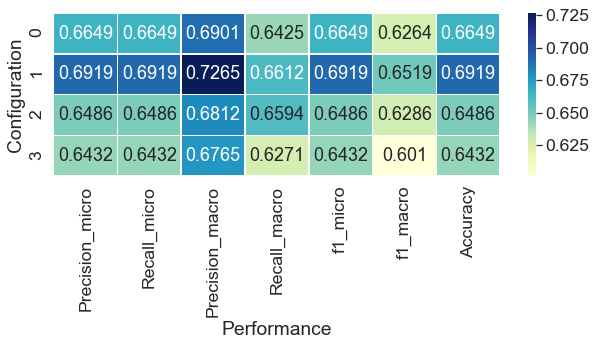

In [74]:
rsl=pd.DataFrame(prf, columns=evlp)
rsl.to_csv('CSVOUT/KNNprf3.csv')
plt.figure(figsize=(10,3))
sb.set(font_scale=1.6)
sb.heatmap(rsl, annot=True, cmap="YlGnBu", linewidths=.5, fmt="g", annot_kws={"size": 18})
plt.xlabel('Performance')
plt.ylabel('Configuration')
#plt.title('Confusion Matrix KNN_fig2')
plt.savefig('Fig/KNNprf3.png', dpi=300, bbox_inches='tight', pad_inches=0.2)

In [75]:
##############################################

In [76]:
evlp=['Precision_micro','Recall_micro','Precision_macro','Recall_macro','f1_micro',
     'f1_macro','Accuracy']
confp=['max df','min df','ngram','idf','no. token','algorithm','leafsize',
       'metric','K','p']
confg=[]
prf=[]

In [77]:
vc1=CountVectorizer(analyzer='word', binary=False, lowercase=True, max_df=0.35, min_df=1,
                   ngram_range=(1, 12), stop_words=stpwd)
idft1=TfidfTransformer()

In [78]:
TrDX=vc1.fit_transform(Trfob)
TrDtX=idft1.fit_transform(TrDX.toarray())
###############
TsDX=vc1.transform(Tsfob)
TsDtX=idft1.transform(TsDX.toarray())

In [79]:
TrD=pd.DataFrame(TrDX.toarray(), columns=vc1.get_feature_names())
TrDt=pd.DataFrame(TrDtX.toarray(), columns=vc1.get_feature_names())
###############
TsD=pd.DataFrame(TsDX.toarray(), columns=vc1.get_feature_names())
TsDt=pd.DataFrame(TsDtX.toarray(), columns=vc1.get_feature_names())

In [80]:
print(TrD.shape, TrDt.shape, TsD.shape, TsDt.shape)

(499, 498538) (499, 498538) (185, 498538) (185, 498538)


In [81]:
clf=KNeighborsClassifier()

In [82]:
clf.fit(TrD, Tr_lbl) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [83]:
y_pred=clf.predict(TsD)
a1=precision_score(Ts_lbl, y_pred, average='micro')
a2=recall_score(Ts_lbl, y_pred, average='micro')
a3=precision_score(Ts_lbl, y_pred, average='macro')
a4=recall_score(Ts_lbl, y_pred, average='macro') 
a5=f1_score(Ts_lbl, y_pred, average='micro')
a6=f1_score(Ts_lbl, y_pred, average='macro')
a7=accuracy_score(Ts_lbl, y_pred)
print(a1,'\n',a2,'\n',a3,'\n',a4,'\n',a5,'\n',a6,'\n',a7)

0.22702702702702704 
 0.22702702702702704 
 0.3110162388908033 
 0.2747698022698023 
 0.22702702702702704 
 0.1304784591745439 
 0.22702702702702704


c:\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [84]:
#ruk ruk

In [85]:
prf.append((round(a1,4),round(a2,4),round(a3,4),round(a4,4),round(a5,4),round(a6,4),round(a7,4)))
confg.append(('0.35','1',"1 - 12",'No','498538','auto','30','minkowski','5','2'))

In [86]:
#####################

In [87]:
vc1=CountVectorizer(analyzer='word', binary=False, lowercase=True, max_df=0.35, min_df=0.005,
                   ngram_range=(1, 1), stop_words=stpwd)
idft1=TfidfTransformer()

In [88]:
TrDX=vc1.fit_transform(Trfob)
TrDtX=idft1.fit_transform(TrDX.toarray())
###############
TsDX=vc1.transform(Tsfob)
TsDtX=idft1.transform(TsDX.toarray())

In [89]:
TrD=pd.DataFrame(TrDX.toarray(), columns=vc1.get_feature_names())
TrDt=pd.DataFrame(TrDtX.toarray(), columns=vc1.get_feature_names())
###############
TsD=pd.DataFrame(TsDX.toarray(), columns=vc1.get_feature_names())
TsDt=pd.DataFrame(TsDtX.toarray(), columns=vc1.get_feature_names())

In [90]:
print(TrD.shape, TrDt.shape, TsD.shape, TsDt.shape)

(499, 2179) (499, 2179) (185, 2179) (185, 2179)


In [91]:
clf=KNeighborsClassifier()

In [92]:
clf.fit(TrD, Tr_lbl)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [93]:
y_pred=clf.predict(TsD)
a1=precision_score(Ts_lbl, y_pred, average='micro')
a2=recall_score(Ts_lbl, y_pred, average='micro')
a3=precision_score(Ts_lbl, y_pred, average='macro')
a4=recall_score(Ts_lbl, y_pred, average='macro') 
a5=f1_score(Ts_lbl, y_pred, average='micro')
a6=f1_score(Ts_lbl, y_pred, average='macro')
a7=accuracy_score(Ts_lbl, y_pred)
print(a1,'\n',a2,'\n',a3,'\n',a4,'\n',a5,'\n',a6,'\n',a7)

0.5621621621621622 
 0.5621621621621622 
 0.6391298073906769 
 0.6062481369003108 
 0.5621621621621622 
 0.557064711446626 
 0.5621621621621622


In [94]:
#ruk

In [95]:
prf.append((round(a1,4),round(a2,4),round(a3,4),round(a4,4),round(a5,4),round(a6,4),round(a7,4)))
confg.append(('0.35','0.005',"1 - 1",'No','2179','auto','30','minkowski','5','2'))

In [96]:
############

In [97]:
clf.fit(TrDt, Tr_lbl)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [98]:
y_pred=clf.predict(TsDt)
a1=precision_score(Ts_lbl, y_pred, average='micro')
a2=recall_score(Ts_lbl, y_pred, average='micro')
a3=precision_score(Ts_lbl, y_pred, average='macro')
a4=recall_score(Ts_lbl, y_pred, average='macro') 
a5=f1_score(Ts_lbl, y_pred, average='micro')
a6=f1_score(Ts_lbl, y_pred, average='macro')
a7=accuracy_score(Ts_lbl, y_pred)
print(a1,'\n',a2,'\n',a3,'\n',a4,'\n',a5,'\n',a6,'\n',a7)

0.6810810810810811 
 0.6810810810810811 
 0.7410478068082085 
 0.6773017483887049 
 0.6810810810810811 
 0.6827306550055238 
 0.6810810810810811


In [99]:
prf.append((round(a1,4),round(a2,4),round(a3,4),round(a4,4),round(a5,4),round(a6,4),round(a7,4)))
confg.append(('0.35','0.005',"1 - 1",'Yes','2179','auto','30','minkowski','5','2'))

In [100]:
#ruk ruk ###########ruk

In [101]:
vc1=CountVectorizer(analyzer='word', binary=False, lowercase=True, max_df=0.35, min_df=0.005,
                   ngram_range=(1, 3), stop_words=stpwd)
idft1=TfidfTransformer()

In [102]:
TrDX=vc1.fit_transform(Trfob)
TrDtX=idft1.fit_transform(TrDX.toarray())
###############
TsDX=vc1.transform(Tsfob)
TsDtX=idft1.transform(TsDX.toarray())

In [103]:
TrD=pd.DataFrame(TrDX.toarray(), columns=vc1.get_feature_names())
TrDt=pd.DataFrame(TrDtX.toarray(), columns=vc1.get_feature_names())
###############
TsD=pd.DataFrame(TsDX.toarray(), columns=vc1.get_feature_names())
TsDt=pd.DataFrame(TsDtX.toarray(), columns=vc1.get_feature_names())

In [104]:
print(TrD.shape, TrDt.shape, TsD.shape, TsDt.shape)

(499, 7128) (499, 7128) (185, 7128) (185, 7128)


In [105]:
clf=KNeighborsClassifier()

In [106]:
clf.fit(TrDt, Tr_lbl)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [107]:
y_pred=clf.predict(TsDt)
a1=precision_score(Ts_lbl, y_pred, average='micro')
a2=recall_score(Ts_lbl, y_pred, average='micro')
a3=precision_score(Ts_lbl, y_pred, average='macro')
a4=recall_score(Ts_lbl, y_pred, average='macro') 
a5=f1_score(Ts_lbl, y_pred, average='micro')
a6=f1_score(Ts_lbl, y_pred, average='macro')
a7=accuracy_score(Ts_lbl, y_pred)
print(a1,'\n',a2,'\n',a3,'\n',a4,'\n',a5,'\n',a6,'\n',a7)

0.6648648648648648 
 0.6648648648648648 
 0.6975285540304796 
 0.6496040181909748 
 0.6648648648648648 
 0.6364502960433193 
 0.6648648648648648


In [108]:
prf.append((round(a1,4),round(a2,4),round(a3,4),round(a4,4),round(a5,4),round(a6,4),round(a7,4)))
confg.append(('0.35','0.005',"1 - 3",'Yes','7128','auto','30','minkowski','5','2'))

In [109]:
########################################

In [110]:
vc1=CountVectorizer(analyzer='word', binary=False, lowercase=True, max_df=0.35, min_df=0.005,
                   ngram_range=(1, 1), stop_words=stpwd)
idft1=TfidfTransformer()

In [111]:
TrDX=vc1.fit_transform(Trfob)
TrDtX=idft1.fit_transform(TrDX.toarray())
###############
TsDX=vc1.transform(Tsfob)
TsDtX=idft1.transform(TsDX.toarray())

In [112]:
TrD=pd.DataFrame(TrDX.toarray(), columns=vc1.get_feature_names())
TrDt=pd.DataFrame(TrDtX.toarray(), columns=vc1.get_feature_names())
###############
TsD=pd.DataFrame(TsDX.toarray(), columns=vc1.get_feature_names())
TsDt=pd.DataFrame(TsDtX.toarray(), columns=vc1.get_feature_names())

In [113]:
print(TrD.shape, TrDt.shape, TsD.shape, TsDt.shape)

(499, 2179) (499, 2179) (185, 2179) (185, 2179)


In [114]:
clf=KNeighborsClassifier(algorithm='kd_tree',n_neighbors=5)

In [115]:
clf.fit(TrDt, Tr_lbl)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [116]:
y_pred=clf.predict(TsDt)
a1=precision_score(Ts_lbl, y_pred, average='micro')
a2=recall_score(Ts_lbl, y_pred, average='micro')
a3=precision_score(Ts_lbl, y_pred, average='macro')
a4=recall_score(Ts_lbl, y_pred, average='macro') 
a5=f1_score(Ts_lbl, y_pred, average='micro')
a6=f1_score(Ts_lbl, y_pred, average='macro')
a7=accuracy_score(Ts_lbl, y_pred)
print(a1,'\n',a2,'\n',a3,'\n',a4,'\n',a5,'\n',a6,'\n',a7)

0.6810810810810811 
 0.6810810810810811 
 0.7410478068082085 
 0.6773017483887049 
 0.6810810810810811 
 0.6827306550055238 
 0.6810810810810811


In [117]:
prf.append((round(a1,4),round(a2,4),round(a3,4),round(a4,4),round(a5,4),round(a6,4),round(a7,4)))
confg.append(('0.35','0.005',"1 - 1",'Yes','2179','kd tree','30','minkowski','5','2'))

In [118]:
#############cs

In [119]:
vc1=CountVectorizer(analyzer='word', binary=False, lowercase=True, max_df=0.35, min_df=0.005,
                   ngram_range=(1, 1), stop_words=stpwd)
idft1=TfidfTransformer()

In [120]:
TrDX=vc1.fit_transform(Trfob)
TrDtX=idft1.fit_transform(TrDX.toarray())
###############
TsDX=vc1.transform(Tsfob)
TsDtX=idft1.transform(TsDX.toarray())

In [121]:
TrD=pd.DataFrame(TrDX.toarray(), columns=vc1.get_feature_names())
TrDt=pd.DataFrame(TrDtX.toarray(), columns=vc1.get_feature_names())
###############
TsD=pd.DataFrame(TsDX.toarray(), columns=vc1.get_feature_names())
TsDt=pd.DataFrame(TsDtX.toarray(), columns=vc1.get_feature_names())

In [122]:
print(TrD.shape, TrDt.shape, TsD.shape, TsDt.shape)

(499, 2179) (499, 2179) (185, 2179) (185, 2179)


In [123]:
clf=KNeighborsClassifier(metric='cosine', n_neighbors=5)
clf

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='cosine',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [124]:
clf.fit(TrDt, Tr_lbl)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='cosine',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [125]:
y_pred=clf.predict(TsDt)
a1=precision_score(Ts_lbl, y_pred, average='micro')
a2=recall_score(Ts_lbl, y_pred, average='micro')
a3=precision_score(Ts_lbl, y_pred, average='macro')
a4=recall_score(Ts_lbl, y_pred, average='macro') 
a5=f1_score(Ts_lbl, y_pred, average='micro')
a6=f1_score(Ts_lbl, y_pred, average='macro')
a7=accuracy_score(Ts_lbl, y_pred)
print(a1,'\n',a2,'\n',a3,'\n',a4,'\n',a5,'\n',a6,'\n',a7)

0.6810810810810811 
 0.6810810810810811 
 0.7258326967150495 
 0.6776293487163053 
 0.6810810810810811 
 0.6788856873447666 
 0.6810810810810811


In [126]:
prf.append((round(a1,4),round(a2,4),round(a3,4),round(a4,4),round(a5,4),round(a6,4),round(a7,4)))
confg.append(('0.35','0.005',"1 - 1",'Yes','2179','auto','30','cosine','5','2'))

In [127]:
##############ec

In [128]:
vc1=CountVectorizer(analyzer='word', binary=False, lowercase=True, max_df=0.35, min_df=0.005,
                   ngram_range=(1, 1), stop_words=stpwd)
idft1=TfidfTransformer()

In [129]:
TrDX=vc1.fit_transform(Trfob)
TrDtX=idft1.fit_transform(TrDX.toarray())
###############
TsDX=vc1.transform(Tsfob)
TsDtX=idft1.transform(TsDX.toarray())

In [130]:
TrD=pd.DataFrame(TrDX.toarray(), columns=vc1.get_feature_names())
TrDt=pd.DataFrame(TrDtX.toarray(), columns=vc1.get_feature_names())
###############
TsD=pd.DataFrame(TsDX.toarray(), columns=vc1.get_feature_names())
TsDt=pd.DataFrame(TsDtX.toarray(), columns=vc1.get_feature_names())

In [131]:
print(TrD.shape, TrDt.shape, TsD.shape, TsDt.shape)

(499, 2179) (499, 2179) (185, 2179) (185, 2179)


In [132]:
clf=KNeighborsClassifier(metric='euclidean', n_neighbors=5, p=3)#looks no effect from p

In [133]:
clf.fit(TrDt, Tr_lbl)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=5, p=3,
           weights='uniform')

In [134]:
y_pred=clf.predict(TsDt)
a1=precision_score(Ts_lbl, y_pred, average='micro')
a2=recall_score(Ts_lbl, y_pred, average='micro')
a3=precision_score(Ts_lbl, y_pred, average='macro')
a4=recall_score(Ts_lbl, y_pred, average='macro') 
a5=f1_score(Ts_lbl, y_pred, average='micro')
a6=f1_score(Ts_lbl, y_pred, average='macro')
a7=accuracy_score(Ts_lbl, y_pred)
print(a1,'\n',a2,'\n',a3,'\n',a4,'\n',a5,'\n',a6,'\n',a7)

0.6810810810810811 
 0.6810810810810811 
 0.7410478068082085 
 0.6773017483887049 
 0.6810810810810811 
 0.6827306550055238 
 0.6810810810810811


In [135]:
prf.append((round(a1,4),round(a2,4),round(a3,4),round(a4,4),round(a5,4),round(a6,4),round(a7,4)))
confg.append(('0.35','0.005',"1 - 1",'Yes','2179','auto','30','euclidean','5','3'))

In [136]:
stp=pd.DataFrame(confg, columns=confp)
stp.to_csv('CSVOUT/KNNconf4.csv')
stp

,max df,min df,ngram,idf,no. token,algorithm,leafsize,metric,K,p
0,0.35,1,1 - 12,No,498538,auto,30,minkowski,5,2
1,0.35,0.005,1 - 1,No,2179,auto,30,minkowski,5,2
2,0.35,0.005,1 - 1,Yes,2179,auto,30,minkowski,5,2
3,0.35,0.005,1 - 3,Yes,7128,auto,30,minkowski,5,2
4,0.35,0.005,1 - 1,Yes,2179,kd tree,30,minkowski,5,2
5,0.35,0.005,1 - 1,Yes,2179,auto,30,cosine,5,2
6,0.35,0.005,1 - 1,Yes,2179,auto,30,euclidean,5,3


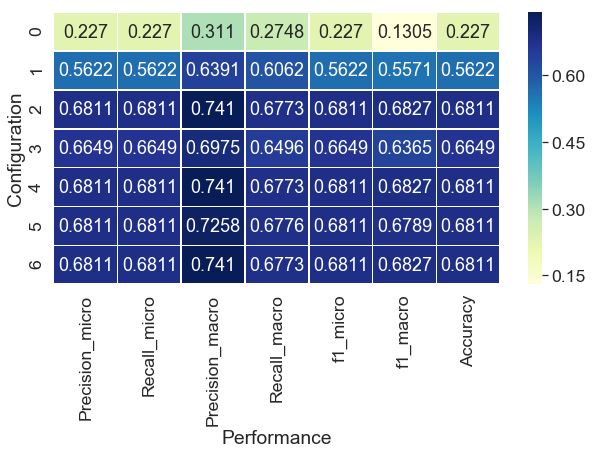

In [137]:
rsl=pd.DataFrame(prf, columns=evlp)
rsl.to_csv('CSVOUT/KNNprf4.csv')
plt.figure(figsize=(10,5))
sb.set(font_scale=1.6)
sb.heatmap(rsl, annot=True, cmap="YlGnBu", linewidths=.5, fmt="g", annot_kws={"size": 18})
plt.xlabel('Performance')
plt.ylabel('Configuration')
#plt.title('Confusion Matrix KNN_fig2')
plt.savefig('Fig/KNNprf4.png', dpi=300, bbox_inches='tight', pad_inches=0.2)

In [138]:
confp=['max df','min df','ngram','idf','no. token','algorithm','leafsize',
       'metric','K','p']
confg=[]

In [139]:
clf=KNeighborsClassifier(metric='cosine', n_neighbors=7, p=2)#looks no effect from p
clf

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='cosine',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='uniform')

In [140]:
confg.append(('0.35','0.005',"1 - 1",'Yes','2179','auto','30','cosine','7','2'))

In [141]:
cvp=['1','2','3','4','5','6','7','8','9','10','Average','metric','cv fold']
cvs=[]
clf_crs=cross_val_score(clf, TsDt, Ts_lbl, cv=10, scoring='f1_micro')
sr1=[round(e,4) for e in clf_crs]
a1=(sum(clf_crs)/10)
sr1.append(a1)
sr1.append('f1 micro')
sr1.append('10')
print(sr1,'\n','Average Score :',a1)
clf_crs=cross_val_score(clf, TsDt, Ts_lbl, cv=10, scoring='f1_macro')
sr2=[round(e,4) for e in clf_crs]
a2=(sum(clf_crs)/10)
sr2.append(a2)
sr2.append('f1 macro')
sr2.append('10')
print(sr2,'\n','Average Score :',a2)
cvs.append(sr1)
cvs.append(sr2)
rsl=pd.DataFrame(cvs, columns=cvp)
rsl.to_csv('CSVOUT/KNNcvp110.csv')
rsl

c:\python\python37\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
c:\python\python37\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
c:\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[0.5217, 0.6087, 0.4091, 0.5, 0.6471, 0.8824, 0.5882, 0.8125, 0.6, 0.4667, 0.6036339417189801, 'f1 micro', '10'] 
 Average Score : 0.6036339417189801
[0.4598, 0.4862, 0.2375, 0.536, 0.5583, 0.7944, 0.4926, 0.6562, 0.5333, 0.4352, 0.5189531448943214, 'f1 macro', '10'] 
 Average Score : 0.5189531448943214


c:\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: Undefin

,1,2,3,4,5,6,7,8,9,10,Average,metric,cv fold
0,0.5217,0.6087,0.4091,0.500,0.6471,0.8824,0.5882,0.8125,0.6000,0.4667,0.603634,f1 micro,10
1,0.4598,0.4862,0.2375,0.536,0.5583,0.7944,0.4926,0.6562,0.5333,0.4352,0.518953,f1 macro,10


In [142]:
cvp=['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20',
    'Average','metric','cv fold']
cvs=[]
clf_crs=cross_val_score(clf, TsDt, Ts_lbl, cv=20, scoring='f1_micro')
sr1=[round(e,4) for e in clf_crs]
a1=(sum(clf_crs)/20)
sr1.append(a1)
sr1.append('f1 micro')
sr1.append('20')
print(sr1,'\n','Average Score :',a1)
clf_crs=cross_val_score(clf, TsDt, Ts_lbl, cv=20, scoring='f1_macro')
sr2=[round(e,4) for e in clf_crs]
a2=(sum(clf_crs)/20)
sr2.append(a2)
sr2.append('f1 macro')
sr2.append('20')
print(sr2,'\n','Average Score :',a2)
cvs.append(sr1)
cvs.append(sr2)
rsl=pd.DataFrame(cvs, columns=cvp)
rsl.to_csv('CSVOUT/KNNcvpf120.csv')
rsl
#print(len(sr1),len(sr2))

c:\python\python37\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=20.
  % (min_groups, self.n_splits)), Warning)


[0.5333, 0.5333, 0.7143, 0.5385, 0.4545, 0.5455, 0.6364, 0.3636, 0.7, 0.8, 0.75, 0.875, 0.625, 1.0, 0.8333, 0.6667, 0.8333, 0.4, 0.4, 0.4, 0.6301373626373626, 'f1 micro', '20'] 
 Average Score : 0.6301373626373626


c:\python\python37\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=20.
  % (min_groups, self.n_splits)), Warning)
c:\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\python\python37\lib\site-packages\skl

[0.46, 0.42, 0.6376, 0.4222, 0.3125, 0.4214, 0.5417, 0.2778, 0.725, 0.6833, 0.6889, 0.8889, 0.4762, 1.0, 0.76, 0.5333, 0.7333, 0.3333, 0.3333, 0.2778, 0.5463287037037038, 'f1 macro', '20'] 
 Average Score : 0.5463287037037038


c:\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\python\python37\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
c:\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\python\python37\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


,1,2,3,4,5,6,7,8,9,10,...,14,15,16,17,18,19,20,Average,metric,cv fold
0,0.5333,0.5333,0.7143,0.5385,0.4545,0.5455,0.6364,0.3636,0.700,0.8000,...,1.0,0.8333,0.6667,0.8333,0.4000,0.4000,0.4000,0.630137,f1 micro,20
1,0.4600,0.4200,0.6376,0.4222,0.3125,0.4214,0.5417,0.2778,0.725,0.6833,...,1.0,0.7600,0.5333,0.7333,0.3333,0.3333,0.2778,0.546329,f1 macro,20


In [143]:
clf=KNeighborsClassifier(algorithm='kd_tree', metric='euclidean', n_neighbors=7, p=3)
#looks no effect from p

In [144]:
confg.append(('0.35','0.005',"1 - 1",'Yes','2179','kd tree','30','euclidean','7','3'))

In [145]:
cvp=['1','2','3','4','5','6','7','8','9','10','Average','metric','cv fold']
cvs=[]
clf_crs=cross_val_score(clf, TsDt, Ts_lbl, cv=10, scoring='f1_micro')
sr1=[round(e,4) for e in clf_crs]
a1=(sum(clf_crs)/10)
sr1.append(a1)
sr1.append('f1 micro')
sr1.append('10')
print(sr1,'\n','Average Score :',a1)
clf_crs=cross_val_score(clf, TsDt, Ts_lbl, cv=10, scoring='f1_macro')
sr2=[round(e,4) for e in clf_crs]
a2=(sum(clf_crs)/10)
sr2.append(a2)
sr2.append('f1 macro')
sr2.append('10')
print(sr2,'\n','Average Score :',a2)
cvs.append(sr1)
cvs.append(sr2)
rsl=pd.DataFrame(cvs, columns=cvp)
rsl.to_csv('CSVOUT/KNNcvpf210.csv')
rsl

c:\python\python37\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


[0.5217, 0.6087, 0.4091, 0.5, 0.6471, 0.8824, 0.5882, 0.8125, 0.6, 0.4667, 0.6036339417189801, 'f1 micro', '10'] 
 Average Score : 0.6036339417189801


c:\python\python37\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
c:\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\python\python37\lib\site-packages\skl

[0.4598, 0.4862, 0.2375, 0.536, 0.5583, 0.7944, 0.506, 0.6562, 0.5333, 0.4352, 0.5202924306086071, 'f1 macro', '10'] 
 Average Score : 0.5202924306086071


c:\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\python\python37\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


,1,2,3,4,5,6,7,8,9,10,Average,metric,cv fold
0,0.5217,0.6087,0.4091,0.500,0.6471,0.8824,0.5882,0.8125,0.6000,0.4667,0.603634,f1 micro,10
1,0.4598,0.4862,0.2375,0.536,0.5583,0.7944,0.5060,0.6562,0.5333,0.4352,0.520292,f1 macro,10


In [146]:
cvp=['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20',
    'Average','metric','cv fold']
cvs=[]
clf_crs=cross_val_score(clf, TsDt, Ts_lbl, cv=20, scoring='f1_micro')
sr1=[round(e,4) for e in clf_crs]
a1=(sum(clf_crs)/20)
sr1.append(a1)
sr1.append('f1 micro')
sr1.append('20')
print(sr1,'\n','Average Score :',a1)
clf_crs=cross_val_score(clf, TsDt, Ts_lbl, cv=20, scoring='f1_macro')
sr2=[round(e,4) for e in clf_crs]
a2=(sum(clf_crs)/20)
sr2.append(a2)
sr2.append('f1 macro')
sr2.append('20')
print(sr2,'\n','Average Score :',a2)
cvs.append(sr1)
cvs.append(sr2)
rsl=pd.DataFrame(cvs, columns=cvp)
rsl.to_csv('CSVOUT/KNNcvpf20.csv')
rsl

c:\python\python37\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=20.
  % (min_groups, self.n_splits)), Warning)


[0.5333, 0.5333, 0.7143, 0.5385, 0.4545, 0.5455, 0.5455, 0.3636, 0.7, 0.8, 0.75, 0.875, 0.625, 1.0, 0.8333, 0.6667, 0.8333, 0.4, 0.4, 0.4, 0.6255919080919081, 'f1 micro', '20'] 
 Average Score : 0.6255919080919081


c:\python\python37\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=20.
  % (min_groups, self.n_splits)), Warning)
c:\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\python\python37\lib\site-packages\skl

[0.46, 0.42, 0.6376, 0.4222, 0.3125, 0.4214, 0.5083, 0.2778, 0.725, 0.6833, 0.6889, 0.8889, 0.4762, 1.0, 0.76, 0.5333, 0.7333, 0.3333, 0.3333, 0.2778, 0.5446620370370371, 'f1 macro', '20'] 
 Average Score : 0.5446620370370371


c:\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\python\python37\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
c:\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarni

,1,2,3,4,5,6,7,8,9,10,...,14,15,16,17,18,19,20,Average,metric,cv fold
0,0.5333,0.5333,0.7143,0.5385,0.4545,0.5455,0.5455,0.3636,0.700,0.8000,...,1.0,0.8333,0.6667,0.8333,0.4000,0.4000,0.4000,0.625592,f1 micro,20
1,0.4600,0.4200,0.6376,0.4222,0.3125,0.4214,0.5083,0.2778,0.725,0.6833,...,1.0,0.7600,0.5333,0.7333,0.3333,0.3333,0.2778,0.544662,f1 macro,20


In [147]:
stp=pd.DataFrame(confg, columns=confp)
stp.to_csv('CSVOUT/KNNconfFFF.csv')
stp

,max df,min df,ngram,idf,no. token,algorithm,leafsize,metric,K,p
0,0.35,0.005,1 - 1,Yes,2179,auto,30,cosine,7,2
1,0.35,0.005,1 - 1,Yes,2179,kd tree,30,euclidean,7,3
